<a href="https://colab.research.google.com/github/pbeens/OTF-Data-Analysis-2021-05/blob/main/Demo_Fixing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you open this document in Colab, use the Table of Contents on the left to go directly to the section you are interested in.**

Short URL of this document on GitHub: https://bit.ly/3nOqXY7

# Deleting Rows

## Deleting Rows at the Beginning or End

In [1]:
# Read in and prep the test data
# The data is a partial extract from https://dieselnet.com/standards/us/fe.php
# Observation: The last line is not needed and needs to be deleted

import pandas as pd

url = 'https://raw.githubusercontent.com/pbeens/OTF-Data-Analysis-2021-05/main/datafiles/bad_cafe_data.csv'

df = pd.read_csv(url)
df

,Year,CAFE MPG,All Light Trucks CAFE MPG
0,2007,27.5,22.2
1,2008,27.5,22.5
2,2009,27.5,23.1
3,2010,27.5,23.5
4,2011,27.5,a
5,a Reformed CAFE standards,a Reformed CAFE standards,a Reformed CAFE standards


In [2]:
# Let's use slicing to only keep the lines we want (0-4).
# For more info on slicing, see https://realpython.com/lessons/indexing-and-slicing/

df = df[:-1] 
df

,Year,CAFE MPG,All Light Trucks CAFE MPG
0,2007,27.5,22.2
1,2008,27.5,22.5
2,2009,27.5,23.1
3,2010,27.5,23.5
4,2011,27.5,a


## Deleting Rows in the Middle

In [3]:
# What if we want to drop a row in the middle?
# Let's delete 2009 (row 2)

df = df.drop(2)
df

,Year,CAFE MPG,All Light Trucks CAFE MPG
0,2007,27.5,22.2
1,2008,27.5,22.5
3,2010,27.5,23.5
4,2011,27.5,a


# Replacing Specific Data

This example shows corrupt data that needs to be manually replaced.

In [4]:
# Read in and prep the test data
# Observation: "Earth" in the name column is "Earth(a)" and has to be replaced.

url = 'https://en.wikipedia.org/wiki/Planet'

df_list_of_tables = pd.read_html(url) 
df = df_list_of_tables[7] # enter the index number of the table

df

,Unnamed: 0,Name,Equatorialdiameter [i],Mass [i],Semi-major axis (AU),Orbital period(years),Inclinationto Sun's equator (°),Orbitaleccentricity,Rotation period(days),Confirmedmoons,Axial tilt (°),Rings,Atmosphere
0,1.,Mercury,0.383,0.06,0.39,0.24,3.38,0.206,58.65,0,0.10,no,minimal
1,2.,Venus,0.949,0.81,0.72,0.62,3.86,0.007,−243.02,0,177.30,no,"CO2, N2"
2,3.,Earth (a),1.000,1.00,1.00,1.00,7.25,0.017,1.00,1,23.44,no,"N2, O2, Ar"
3,4.,Mars,0.532,0.11,1.52,1.88,5.65,0.093,1.03,2,25.19,no,"CO2, N2, Ar"
4,5.,Jupiter,11.209,317.83,5.20,11.86,6.09,0.048,0.41,79,3.12,yes,"H2, He"
5,6.,Saturn,9.449,95.16,9.54,29.45,5.51,0.054,0.44,82,26.73,yes,"H2, He"
6,7.,Uranus,4.007,14.54,19.19,84.02,6.48,0.047,−0.72,27,97.86,yes,"H2, He, CH4"
7,8.,Neptune,3.883,17.15,30.07,164.79,6.43,0.009,0.67,14,29.60,yes,"H2, He, CH4"
8,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...


## Replace One Item

In [5]:
# This is how we access the Earth line. It is index #2.

df.loc[2]

Unnamed: 0                                 3.
Name                                Earth (a)
Equatorialdiameter [i]                  1.000
Mass [i]                                 1.00
Semi-major axis (AU)                     1.00
Orbital period(years)                    1.00
Inclinationto Sun's equator (°)          7.25
Orbitaleccentricity                     0.017
Rotation period(days)                    1.00
Confirmedmoons                              1
Axial tilt (°)                          23.44
Rings                                      no
Atmosphere                         N2, O2, Ar
Name: 2, dtype: object

In [6]:
# This is how we access the Name column in index 2.bit_length
# Note: the \u2009 we see in the output is unicode for "thin space"

df.loc[2]['Name']

'Earth\u2009(a)'

In [7]:
# Let's replace it...

df.loc[2,'Name'] = 'Earth'

df.loc[2]

Unnamed: 0                                 3.
Name                                    Earth
Equatorialdiameter [i]                  1.000
Mass [i]                                 1.00
Semi-major axis (AU)                     1.00
Orbital period(years)                    1.00
Inclinationto Sun's equator (°)          7.25
Orbitaleccentricity                     0.017
Rotation period(days)                    1.00
Confirmedmoons                              1
Axial tilt (°)                          23.44
Rings                                      no
Atmosphere                         N2, O2, Ar
Name: 2, dtype: object

## Replacing Something in Each Column Heading

In [8]:
# Replace something in all the headings
# Let's replace (°) with (deg)

df.columns = [col.replace('(°)', '(deg)') for col in df.columns] # list comprehension
df.columns

Index(['Unnamed: 0', 'Name', 'Equatorialdiameter [i]', 'Mass [i]',
       'Semi-major axis (AU)', 'Orbital period(years)',
       'Inclinationto Sun's equator (deg)', 'Orbitaleccentricity',
       'Rotation period(days)', 'Confirmedmoons', 'Axial tilt (deg)', 'Rings',
       'Atmosphere'],
      dtype='object')

# Converting to Dates

This examples shows a date field (FILE_DATE) that need to be converted from "object" to "datetime" so the data can be plotted correctly.

The data is Ontario Covid-19, organized by health region.

In [9]:
# Read in and prep the test data
# Observation: FILE_DATE is an "object" not a valid date format

import pandas as pd
from datetime import date

url = 'https://data.ontario.ca/dataset/1115d5fe-dd84-4c69-b5ed-05bf0c0a0ff9/resource/d1bfe1ad-6575-4352-8302-09ca81f7ddfc/download/cases_by_status_and_phu.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FILE_DATE       13804 non-null  object 
 1   PHU_NAME        13803 non-null  object 
 2   PHU_NUM         13803 non-null  float64
 3   ACTIVE_CASES    13804 non-null  int64  
 4   RESOLVED_CASES  13804 non-null  int64  
 5   DEATHS          13804 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 647.2+ KB


In [10]:
# The method we need is to_datetime()
# Observation: FILE_DATE has been converted to datetime64[ns]

df['FILE_DATE']= pd.to_datetime(df['FILE_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FILE_DATE       13804 non-null  datetime64[ns]
 1   PHU_NAME        13803 non-null  object        
 2   PHU_NUM         13803 non-null  float64       
 3   ACTIVE_CASES    13804 non-null  int64         
 4   RESOLVED_CASES  13804 non-null  int64         
 5   DEATHS          13804 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 647.2+ KB


# Deleting Columns

It's generally not necessary to delete columns with the exception of wanting to export the data to a new data file. 

## Delete a Single Column

In [11]:
# Read in and prep the test data
# The data is a partial extract from https://dieselnet.com/standards/us/fe.php
# Here we want delete the "All Light Trucks CAFE MPG" column

import pandas as pd

url = 'https://raw.githubusercontent.com/pbeens/OTF-Data-Analysis-2021-05/main/datafiles/bad_cafe_data.csv'

df = pd.read_csv(url)
df = df[:-1] 
df

,Year,CAFE MPG,All Light Trucks CAFE MPG
0,2007,27.5,22.2
1,2008,27.5,22.5
2,2009,27.5,23.1
3,2010,27.5,23.5
4,2011,27.5,a


In [12]:
# The command we want for deleting a column is "del"

del df['All Light Trucks CAFE MPG'] # insert the name of the column
df

,Year,CAFE MPG
0,2007,27.5
1,2008,27.5
2,2009,27.5
3,2010,27.5
4,2011,27.5


## Delete All Columns Except...

In [13]:
# Read in and prep the test data

import pandas as pd
from datetime import date

url = 'https://data.ontario.ca/dataset/1115d5fe-dd84-4c69-b5ed-05bf0c0a0ff9/resource/d1bfe1ad-6575-4352-8302-09ca81f7ddfc/download/cases_by_status_and_phu.csv'
df = pd.read_csv(url)
df.columns

Index(['FILE_DATE', 'PHU_NAME', 'PHU_NUM', 'ACTIVE_CASES', 'RESOLVED_CASES',
       'DEATHS'],
      dtype='object')

In [14]:
# We only want to keep 'FILE_DATE' and 'PHU_NAME'
# Put the columns you want to keep in the command

df = df.drop(df.columns.difference(['FILE_DATE', 'PHU_NAME']), 1)
df

,FILE_DATE,PHU_NAME
0,2020-04-10,"HALIBURTON, KAWARTHA, PINE RIDGE"
1,2020-04-10,HALTON REGION
2,2020-04-10,HASTINGS & PRINCE EDWARD COUNTIES
3,2020-04-10,HURON PERTH
4,2020-04-10,"KINGSTON, FRONTENAC, LENNOX & ADDINGTON"
...,...,...
13799,2021-05-05,TORONTO
13800,2021-05-05,WATERLOO REGION
13801,2021-05-05,WELLINGTON-DUFFERIN-GUELPH
13802,2021-05-05,WINDSOR-ESSEX COUNTY


# Editing Headings

Often we don't like the way the headings look when we import them. Here are some typical fixes you might want to make.

In [15]:
# Read in and prep the test data

import pandas as pd

url = 'https://data.ontario.ca/dataset/1115d5fe-dd84-4c69-b5ed-05bf0c0a0ff9/resource/d1bfe1ad-6575-4352-8302-09ca81f7ddfc/download/cases_by_status_and_phu.csv'
df = pd.read_csv(url)
df.columns

Index(['FILE_DATE', 'PHU_NAME', 'PHU_NUM', 'ACTIVE_CASES', 'RESOLVED_CASES',
       'DEATHS'],
      dtype='object')

## Replace Characters

In [16]:
# Let's replace all the underscores with spaces

df.columns = df.columns.str.replace('_', ' ')
df.columns

Index(['FILE DATE', 'PHU NAME', 'PHU NUM', 'ACTIVE CASES', 'RESOLVED CASES',
       'DEATHS'],
      dtype='object')

## Change Case

In [17]:
# title case

df.columns = df.columns.str.title()
df.columns

Index(['File Date', 'Phu Name', 'Phu Num', 'Active Cases', 'Resolved Cases',
       'Deaths'],
      dtype='object')

In [18]:
# upper case

df.columns = df.columns.str.upper() # see also lower()
df.columns

Index(['FILE DATE', 'PHU NAME', 'PHU NUM', 'ACTIVE CASES', 'RESOLVED CASES',
       'DEATHS'],
      dtype='object')

## Renaming One Heading

In [19]:
# renaming one heading
# not very friendly syntax
# note inplace=True

df.rename(columns={'FILE DATE': 'DATE'}, inplace=True)
df.columns

Index(['DATE', 'PHU NAME', 'PHU NUM', 'ACTIVE CASES', 'RESOLVED CASES',
       'DEATHS'],
      dtype='object')

## Renaming Multiple Headings

In [20]:
# renaming multiple headings

df.rename(columns={'PHU NAME': 'REGION',
                   'PHU NUM': 'NUMBER'}, inplace=True)
df.columns

Index(['DATE', 'REGION', 'NUMBER', 'ACTIVE CASES', 'RESOLVED CASES', 'DEATHS'], dtype='object')

In [21]:
df.head()

,DATE,REGION,NUMBER,ACTIVE CASES,RESOLVED CASES,DEATHS
0,2020-04-10,"HALIBURTON, KAWARTHA, PINE RIDGE",2235.0,23,69,18
1,2020-04-10,HALTON REGION,2236.0,112,137,9
2,2020-04-10,HASTINGS & PRINCE EDWARD COUNTIES,2238.0,12,11,1
3,2020-04-10,HURON PERTH,5183.0,20,8,1
4,2020-04-10,"KINGSTON, FRONTENAC, LENNOX & ADDINGTON",2241.0,13,39,0


# Filtering Data

Often we only want to work with a subset of the data. Here's an example of how to filter your data. We'll concentrate on one day and only the largest values of ACTIVE_CASES.

In [22]:
# Read in and prep the test data
# This is Ontario's active COVID data, by region

import pandas as pd

url = 'https://data.ontario.ca/dataset/1115d5fe-dd84-4c69-b5ed-05bf0c0a0ff9/resource/d1bfe1ad-6575-4352-8302-09ca81f7ddfc/download/cases_by_status_and_phu.csv'
df = pd.read_csv(url)
df

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS
0,2020-04-10,"HALIBURTON, KAWARTHA, PINE RIDGE",2235.0,23,69,18
1,2020-04-10,HALTON REGION,2236.0,112,137,9
2,2020-04-10,HASTINGS & PRINCE EDWARD COUNTIES,2238.0,12,11,1
3,2020-04-10,HURON PERTH,5183.0,20,8,1
4,2020-04-10,"KINGSTON, FRONTENAC, LENNOX & ADDINGTON",2241.0,13,39,0
...,...,...,...,...,...,...
13799,2021-05-05,TORONTO,3895.0,11854,132897,3103
13800,2021-05-05,WATERLOO REGION,2265.0,465,13752,252
13801,2021-05-05,WELLINGTON-DUFFERIN-GUELPH,2266.0,453,6671,108
13802,2021-05-05,WINDSOR-ESSEX COUNTY,2268.0,412,14801,417


In [23]:
# First we configure the filter, then we use is in the dataframe
# The boolean expressions are <, <=, >, >=, ==, and !=
# This example puts the filtered data in a new dataframe (today_df). 
#     This isn't necessary.

filt = (df['FILE_DATE'] == '2021-05-01') & (df['ACTIVE_CASES'] > 1000)
today_df = df[filt].sort_values('ACTIVE_CASES', ascending=False) # note new dataframe name
today_df

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS
13663,2021-05-01,TORONTO,3895.0,12425,128342,3049
13655,2021-05-01,PEEL REGION,2253.0,8629,83337,691
13667,2021-05-01,YORK REGION,2270.0,3289,42232,665
13638,2021-05-01,CITY OF OTTAWA,2251.0,2162,21633,507
13639,2021-05-01,DURHAM REGION,2230.0,1752,18637,338
13651,2021-05-01,NIAGARA REGION,2246.0,1432,11983,394
13644,2021-05-01,HALTON REGION,2236.0,1270,13135,211
13637,2021-05-01,CITY OF HAMILTON,2237.0,1087,15783,360
13650,2021-05-01,MIDDLESEX-LONDON,2244.0,1022,9254,200


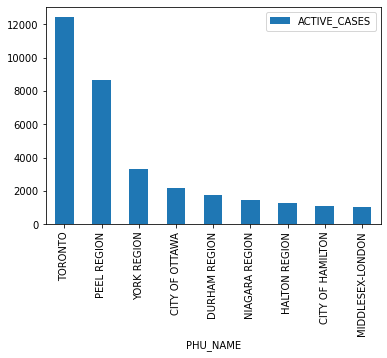

In [24]:
# Confirm with a plot!

today_df.plot(kind='bar', # also try barh
        x='PHU_NAME',
        y='ACTIVE_CASES')